In [33]:
from pathlib import Path
import os
import sys
import pandas as pd
from unidecode import unidecode
import unicodedata
import numpy as np
import math as m
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
ruta = "Resultados/Data_SEN_target.xlsx"
pd.set_option('display.max_rows', 351)   
Data = pd.read_excel(ruta)
Data

,Name1,Name2,Name3,Nombre PowerFactory,Type,EMTP Status,EMTP Load Flow Component,Página PowerFactory,Tensión en Bornes [kV],P despachada [MW],Q despachada [Mvar],Tipo de Barra Flujo de Carga,Sbase [MVA],P_set [MW],Q_set [Mvar],V_set [kV],Tensión Nominal [kV],Potencia Nominal [MVA],Nº_unid_serv,Nº_unid
0,PFV_Capricornio,PFV_Capricornio_new,NaN,PFV CAPRICORNIO,Parque Fotovoltaico,1,NaN,00-Norte Grande,105.74,60.01,-21.67,NaN,95.0190,95.019000,-21.673834,NaN,110.000,95.0190,57,57
1,PFV_Quilapilun,PFV_Quilapilun,NaN,PFV QUILAPILUN,Parque Fotovoltaico,1,NaN,03-Chilquinta-Aconcagua,227.17,99.22,-1.50,NaN,110.0220,99.219840,-1.500300,NaN,220.000,110.0220,66,66
2,PFV_Dona_Carmen,PFV_Dona_Carmen,NaN,PFV DOÑA CARMEN SOLAR,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.04,27.94,0.00,NaN,35.0070,27.938920,0.000000,NaN,220.000,35.0070,21,21
3,PFV_EL_PELICANO,PFV_EL_PELICANO,NaN,NaN,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.54,94.50,-16.10,NaN,110.0022,67.871357,-16.104322,NaN,220.000,110.0022,66,66
4,PFV_LA_HUELLA,PFV_LA_HUELLA,NaN,PFV LA HUELLA,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.46,79.40,-24.07,NaN,94.3800,58.232460,-24.066900,NaN,220.000,94.3800,26,26
5,PFV_EL_ROMERO,PFV_EL_ROMERO,NaN,PFV EL ROMERO,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.33,193.99,-74.31,NaN,206.8891,127.650575,-74.314565,NaN,220.000,206.8891,190,190
6,PFV_VALLE_ESCONDIDO,PFV_VALLE_ESCONDIDO,NaN,PFV VALLE ESCONDIDO,Parque Fotovoltaico,1,NaN,01-Atacama,225.61,104.02,-21.81,NaN,106.6880,65.826496,-21.807027,NaN,220.000,106.6880,64,64
7,PFV_SAN_ANDRES,PFV_SAN_ANDRES,NaN,PFV SAN ANDRES,Parque Fotovoltaico,1,NaN,01-Atacama,225.58,40.01,-6.20,NaN,50.5750,50.575000,-6.200495,NaN,220.000,50.5750,35,35
8,PFV_LLANO_DE_LLAMPOS,PFV_LLANO_DE_LLAMPOS,NaN,PFV LLANO DE LLAMPOS,Parque Fotovoltaico,1,NaN,01-Atacama,224.03,87.02,-34.90,NaN,110.0220,67.883574,-34.898978,NaN,220.000,110.0220,66,66
9,PFV_Pampa_Solar_Norte,PFV_Pampa_Solar_Norte,NaN,PFV PAMPA SOLAR NORTE,Parque Fotovoltaico,1,NaN,01-Atacama,230.12,64.40,-6.30,NaN,70.0140,43.198638,-6.301260,NaN,220.000,70.0140,42,42


In [31]:
Data_PV = Data[(Data['Type'] == 'Parque Fotovoltaico') & (Data['EMTP Status'] == 1)]
Data_WP = Data[(Data['Type'] == 'Parque Eólico') & (Data['EMTP Status'] == 1)]
Data_SG = Data[(Data['Type'] == 'Generador Sincrónico') & (Data['EMTP Status'] == 1)]
Data_GFM = Data[(Data['Type'] == 'Grid Forming') & (Data['EMTP Status'] == 1)]
Data_PMGD = Data[(Data['Type'] == 'PMGD') & (Data['EMTP Status'] == 1)]


SUMA_PV_P = Data_PV['P_set [MW]'].sum()
SUMA_WP_P = Data_WP['P_set [MW]'].sum()
SUMA_SG_P = Data_SG['P_set [MW]'].sum()
SUMA_GFM_P = Data_GFM['P_set [MW]'].sum()
SUMA_PMGD_P = Data_PMGD['P_set [MW]'].sum()

Total = SUMA_PV_P + SUMA_WP_P+ SUMA_SG_P+ SUMA_GFM_P + SUMA_PMGD_P
SUMA_GFL_P = SUMA_PV_P+SUMA_WP_P+SUMA_PMGD_P


pPV= float(100*SUMA_PV_P/Total)
pWP= float(100*SUMA_WP_P/Total)
pSG= float(100*SUMA_SG_P/Total)
pGFM= float(100*SUMA_GFM_P/Total)
pPMGD= float(100*SUMA_PMGD_P/Total)

print(float(pPMGD))

0.0004638168941457758


# Figuras por tipo de generación

C:\Users\fabia\AppData\Local\Temp\ipykernel_21328\2186769680.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de generación', y='Porcentajes', data=df, palette='viridis')


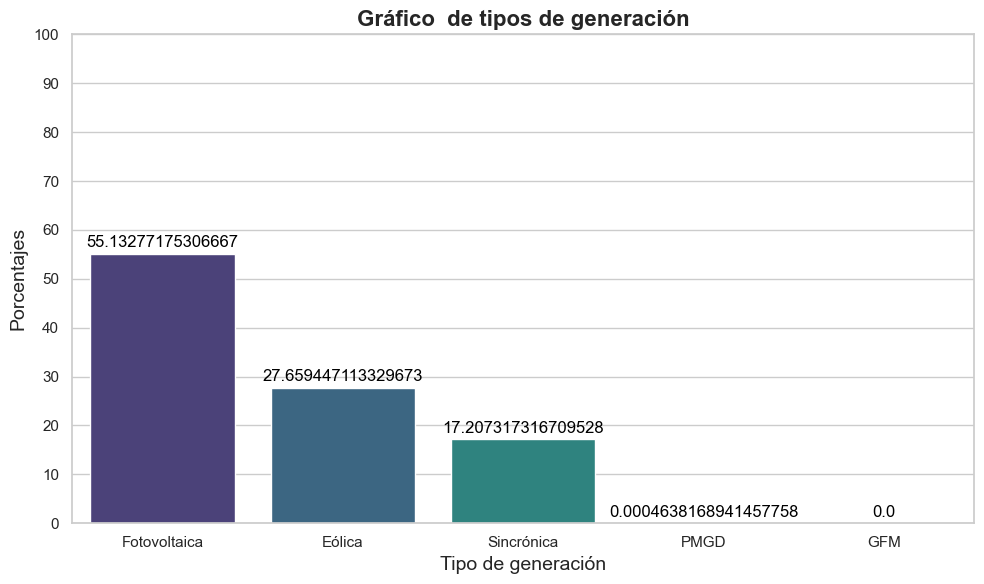

In [38]:


## Añadir etiquetas y título
#plt.xlabel('Tipo de generación')
#plt.ylabel('Valor en Porcentaje')
#plt.title('Gráfico de Barras')


# Datos de ejemplo
data = {
    'Tipo de generación': ['Fotovoltaica', 'Eólica', 'Sincrónica', 'PMGD', 'GFM'],
    'Porcentajes': [pPV, pWP, pSG, pPMGD, pGFM]
}
df = pd.DataFrame(data)

# Estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tipo de generación', y='Porcentajes', data=df, palette='viridis')

# Personalización
ax.set_title('Gráfico  de tipos de generación', fontsize=16, fontweight='bold')
ax.set_xlabel('Tipo de generación', fontsize=14)
ax.set_ylabel('Porcentajes', fontsize=14)
ax.set_yticks(range(0, 101, 10))  # Ajuste de las marcas del eje Y

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points',
                fontsize=12, 
                color='black')

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Graficas por zonas


In [42]:
zonas = [   '00-Norte Grande' ,'01-Atacama','02-Coquimbo','03-Chilquinta-Aconcagua'	, '04-Enel Distribución',
        '05-Colbún'	,'06-Troncal_Qui-Cha', '07-Sistema154 - 66 kV (Centro)','08-Charrúa','09-Concepción', '10-Araucanía']
zonas[0]

'00-Norte Grande'

In [49]:
lista_PV=[]
     
for i in zonas:
      PV = Data_PV[(Data_PV['Página PowerFactory'] == i) ]
      SUMA_PV=  PV['P_set [MW]'].sum()
      lista_PV.append(float(SUMA_PV))

def Potencia_zonas(Data,zonas):
      l_aux=[]
      for i in zonas:
            Generacion = Data[(Data['Página PowerFactory'] == i) ]
            SUMA_Generacion=  Generacion['P_set [MW]'].sum()
            l_aux.append(float(SUMA_Generacion))
      return l_aux      



    


In [ ]:
# Datos de ejemplo con categorías y subcategorías
data = {
    'Categoría': zonas,
    'Subcat_X': [23, 45, 56, 78, 34],
    'Subcat_Y': [35, 50, 60, 70, 30]
}
df = pd.DataFrame(data)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras apiladas con colores personalizados
bar1 = ax.bar(df['Categoría'], df['Subcat_X'], label='Subcat X', color='#3498db')  # Azul claro
bar2 = ax.bar(df['Categoría'], df['Subcat_Y'], bottom=df['Subcat_X'], label='Subcat Y', color='#e74c3c')  # Rojo

# Personalización
ax.set_title('Gráfico de Barras Apiladas con Colores Personalizados', fontsize=16, fontweight='bold')
ax.set_xlabel('Categorías', fontsize=14)
ax.set_ylabel('Valores', fontsize=14)
ax.set_yticks(range(0, 201, 20))  # Ajuste de las marcas del eje Y

# Añadir etiquetas de valores en las barras
for bar in bar1:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2., bar.get_height() / 2), 
                ha='center', va='center', 
                fontsize=10, 
                color='black')

for bar in bar2:
    height = bar.get_height() + bar.get_y()
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2., height - bar.get_height() / 2), 
                ha='center', va='center', 
                fontsize=10, 
                color='black')

# Añadir la leyenda
ax.legend()

# Mejorar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
#nominal en servicio

Data_PV = Data[(Data['Type'] == 'Parque Fotovoltaico') & (Data['EMTP Status'] == 1)]
Data_WP = Data[(Data['Type'] == 'Parque Eólico') & (Data['EMTP Status'] == 1)]
Data_SG = Data[(Data['Type'] == 'Generador Sincrónico') & (Data['EMTP Status'] == 1)]
Data_GFM = Data[(Data['Type'] == 'Grid Forming') & (Data['EMTP Status'] == 1)]

SUMA_PV_nom = Data_PV['Sbase [MVA]'].sum()
SUMA_WP_nom = Data_WP['Sbase [MVA]'].sum()
SUMA_SG_nom = Data_SG['Potencia Nominal [MVA]'].sum()
SUMA_GFM_nom = Data_GFM['Sbase [MVA]'].sum()

Total_nom = SUMA_PV_nom + SUMA_WP_nom+ SUMA_SG_nom+ SUMA_GFM_nom
SUMA_GFL_nom = SUMA_PV_nom+SUMA_WP_nom
pPV_nom= 100*SUMA_PV_nom/Total_nom
pWP_nom= 100*SUMA_WP_nom/Total_nom
pSG_nom= 100*SUMA_SG_nom/Total_nom
pGFM_nom= 100*SUMA_GFM_nom/Total_nom
pGFL_nom= 100*SUMA_GFL_nom/Total_nom
print(SUMA_SG_nom,SUMA_WP_nom)

4664.9360000000015 4686.414000000001


In [23]:
unidades = ["Synchronous Generation","GFL","GFM"]
Sumas =[SUMA_SG_P, SUMA_GFL_P,SUMA_GFM_P ]
Porcentaje = [pSG,pGFL,pGFM]
Suma_nom = [SUMA_SG_nom, SUMA_GFL_nom,SUMA_GFM_nom]
Porcentaje_nom = [pSG_nom,pGFL_nom,pGFM_nom]

data_resultados = {"Type of Generation": unidades, 
                    "Dispatched active power [MW]": Sumas,
                    "Dispatch participation [%]": Porcentaje,
                    "Nominal Capacity in service [MW]" :  Suma_nom,
                    "In-service capacity participation [%]" : Porcentaje_nom
}
data_resultados= pd.DataFrame(data_resultados)
data_resultados

,Type of Generation,Dispatched active power [MW],Dispatch participation [%],Nominal Capacity in service [MW],In-service capacity participation [%]
0,Synchronous Generation,2003.366300,17.207317,4664.9360,24.758842
1,GFL,9639.159162,82.792683,14176.5593,75.241158
2,GFM,0.000000,0.000000,0.0000,0.000000


In [24]:
SG_Snom_serv=Data.loc[(Data['Type'] == "Generador Sincrónico")  & (Data["EMTP Status"] > 0) , 'Potencia Nominal [MVA]'].sum()
PV_Snom_serv=Data.loc[(Data['Type'] == "Parque Fotovoltaico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
WP_Snom_serv=Data.loc[(Data['Type'] == "Parque Eólico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
GFM_Snom_serv=Data.loc[(Data['Type'] == "Grid Forming")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
print(SG_Snom_serv,PV_Snom_serv,WP_Snom_serv,GFM_Snom_serv)

4664.9360000000015 9490.1453 4686.414000000001 0.0


In [25]:
datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

#datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Potencia despachada [MW]')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()

NameError: name 'PFV_P' is not defined

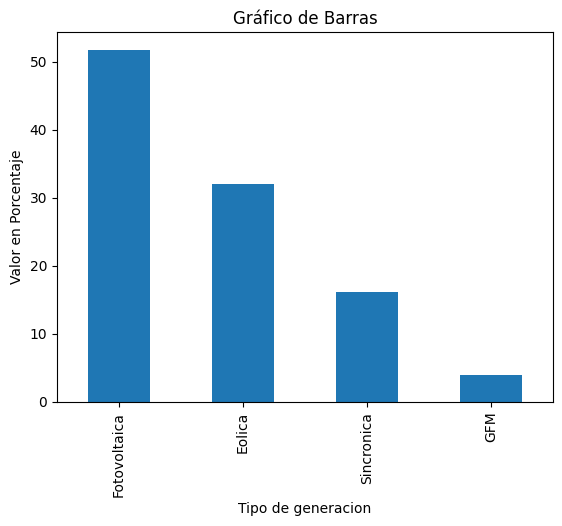

In [21]:
#datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Valor en Porcentaje')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()